In [223]:
import pandas as pd
df = pd.read_csv('user_behavior_dataset.csv')

In [224]:
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [225]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [226]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def normal_stand(col):
    age_array = col.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(age_array)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(normalized_data)
    return scaled_data

In [227]:
def tranformCategorical(train_set, col):
    dummies = pd.get_dummies(train_set[col] )
    train_set = pd.concat([train_set, dummies], axis='columns')
    train_set.drop(col, axis =1, inplace = True)
    return train_set

In [228]:
def process_data(df):
    df = df.drop(columns=['User ID'])
    df = tranformCategorical(df, 'Operating System')
    df = tranformCategorical(df, 'Gender')
    df = tranformCategorical(df, 'Device Model')
    df.replace({False: 0, True: 1}, inplace=True)
    return df

In [229]:
df = process_data(df)
df.head(10)

/var/folders/3l/d24nkjvd3jx71m5q9_915qm00000gn/T/ipykernel_22858/481465291.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Android,iOS,Female,Male,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12
0,393,6.4,1872,67,1122,40,4,1,0,0,1,1,0,0,0,0
1,268,4.7,1331,42,944,47,3,1,0,1,0,0,1,0,0,0
2,154,4.0,761,32,322,42,2,1,0,0,1,0,0,0,1,0
3,239,4.8,1676,56,871,20,3,1,0,0,1,1,0,0,0,0
4,187,4.3,1367,58,988,31,3,0,1,1,0,0,0,0,0,1
5,99,2.0,940,35,564,31,2,1,0,0,1,1,0,0,0,0
6,350,7.3,1802,66,1054,21,4,1,0,1,0,0,0,1,0,0
7,543,11.4,2956,82,1702,31,5,1,0,0,1,0,1,0,0,0
8,340,7.7,2138,75,1053,42,4,1,0,1,0,0,0,1,0,0
9,424,6.6,1957,75,1301,42,4,0,1,0,1,0,0,0,0,1


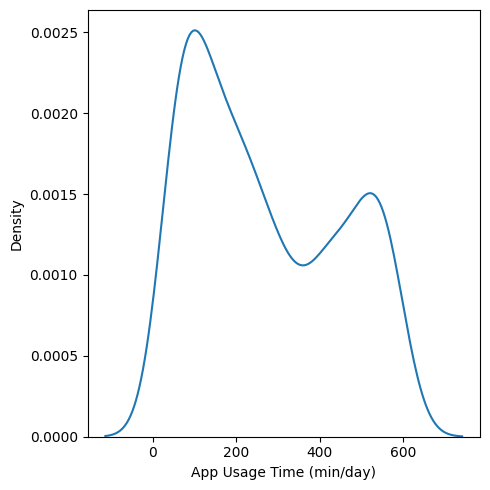

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='App Usage Time (min/day)')
plt.tight_layout()
plt.show()

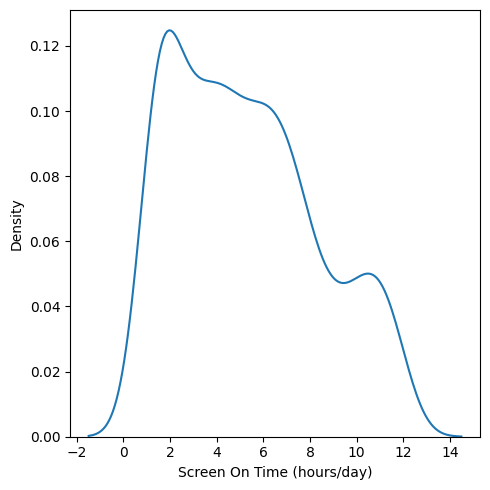

In [231]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='Screen On Time (hours/day)')
plt.tight_layout()
plt.show()

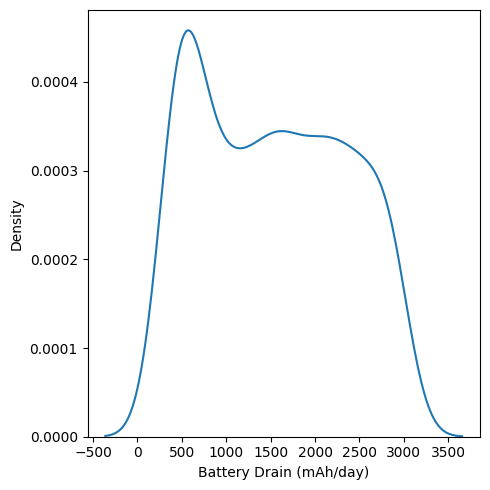

In [232]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='Battery Drain (mAh/day)')
plt.tight_layout()
plt.show()

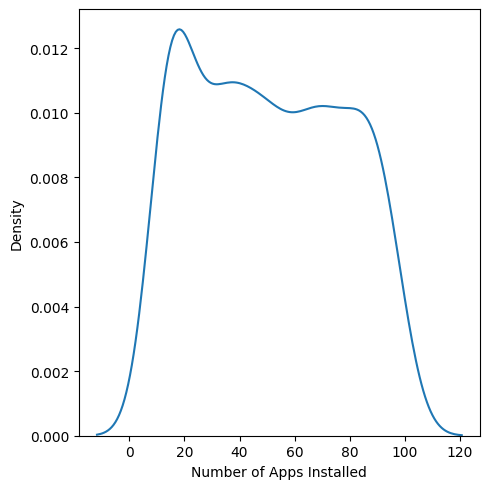

In [233]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='Number of Apps Installed')
plt.tight_layout()
plt.show()

In [234]:
col_list = list(df.columns.values)
col_list.remove('User Behavior Class')
col_list.append('User Behavior Class')
df = df[col_list]
df.head(10)

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Android,iOS,Female,Male,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,User Behavior Class
0,393,6.4,1872,67,1122,40,1,0,0,1,1,0,0,0,0,4
1,268,4.7,1331,42,944,47,1,0,1,0,0,1,0,0,0,3
2,154,4.0,761,32,322,42,1,0,0,1,0,0,0,1,0,2
3,239,4.8,1676,56,871,20,1,0,0,1,1,0,0,0,0,3
4,187,4.3,1367,58,988,31,0,1,1,0,0,0,0,0,1,3
5,99,2.0,940,35,564,31,1,0,0,1,1,0,0,0,0,2
6,350,7.3,1802,66,1054,21,1,0,1,0,0,0,1,0,0,4
7,543,11.4,2956,82,1702,31,1,0,0,1,0,1,0,0,0,5
8,340,7.7,2138,75,1053,42,1,0,1,0,0,0,1,0,0,4
9,424,6.6,1957,75,1301,42,0,1,0,1,0,0,0,0,1,4


In [239]:
df.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Android,iOS,Female,Male,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,User Behavior Class
0,393,6.4,1872,67,1122,40,1,0,0,1,1,0,0,0,0,4
1,268,4.7,1331,42,944,47,1,0,1,0,0,1,0,0,0,3
2,154,4.0,761,32,322,42,1,0,0,1,0,0,0,1,0,2
3,239,4.8,1676,56,871,20,1,0,0,1,1,0,0,0,0,3
4,187,4.3,1367,58,988,31,0,1,1,0,0,0,0,0,1,3


In [252]:
Y = df[list(df.columns.values)[-1]]
df.drop(columns=list(df.columns.values)[-1], axis=1)
X = df
X

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Android,iOS,Female,Male,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,User Behavior Class
0,393,6.4,1872,67,1122,40,1,0,0,1,1,0,0,0,0,4
1,268,4.7,1331,42,944,47,1,0,1,0,0,1,0,0,0,3
2,154,4.0,761,32,322,42,1,0,0,1,0,0,0,1,0,2
3,239,4.8,1676,56,871,20,1,0,0,1,1,0,0,0,0,3
4,187,4.3,1367,58,988,31,0,1,1,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,0,1,0,1,0,0,0,0,1,2
696,316,6.8,1965,68,1201,59,1,0,0,1,0,0,0,1,0,4
697,99,3.1,942,22,457,50,1,0,1,0,1,0,0,0,0,2
698,62,1.7,431,13,224,44,1,0,0,1,0,0,1,0,0,1


In [253]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [254]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 16)
(140, 16)
(560,)
(140,)


In [255]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [261]:
pred_values = model.predict(x_test)
pred_values.shape

(140,)

In [264]:
from sklearn import metrics
metrics.r2_score(y_test, pred_values)


1.0

In [265]:
pd.DataFrame({'Pred': pred_values, 'Act': y_test})

,Pred,Act
306,3.0,3
604,3.0,3
40,3.0,3
493,4.0,4
14,3.0,3
...,...,...
337,1.0,1
266,3.0,3
645,2.0,2
504,5.0,5
